In [5]:
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
plt.rcParams["figure.figsize"] = (20,15)

In [11]:
df = pd.read_table("babyboom.dat.txt", header=None, sep='\s+',
                   names=['24hrtime', 'sex', 'weight', 'minutes'])
df.head()

,24hrtime,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [3]:
df.minutes.mean()

788.7272727272727

In [6]:
df[["weight", "minutes"]].describe()

,weight,minutes
count,44.000000,44.000000
mean,3275.954545,788.727273
std,528.032458,416.066931
min,1745.000000,5.000000
25%,3141.500000,482.750000
50%,3404.000000,846.500000
75%,3571.750000,1158.500000
max,4162.000000,1435.000000


In [7]:
df.corr()

,24hrtime,sex,weight,minutes
24hrtime,1.000000,0.028027,0.075636,0.999840
sex,0.028027,1.000000,0.228751,0.031815
weight,0.075636,0.228751,1.000000,0.079616
minutes,0.999840,0.031815,0.079616,1.000000


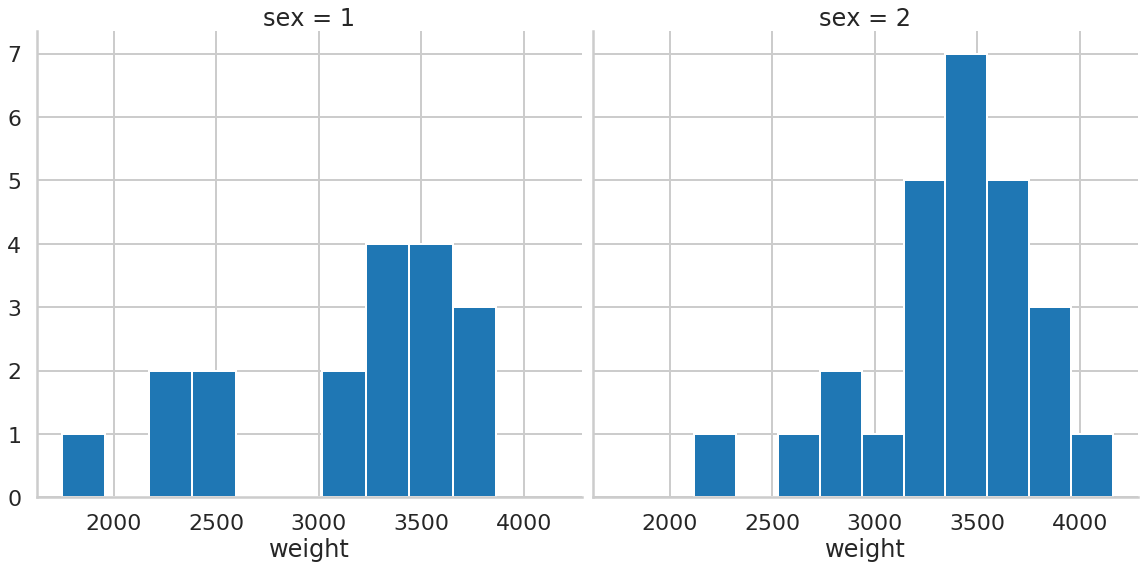

In [14]:
g = sns.FacetGrid(col="sex", data=df, height=8)
g.map(plt.hist, "weight");

Text(0, 0.5, 'exponential pdf')

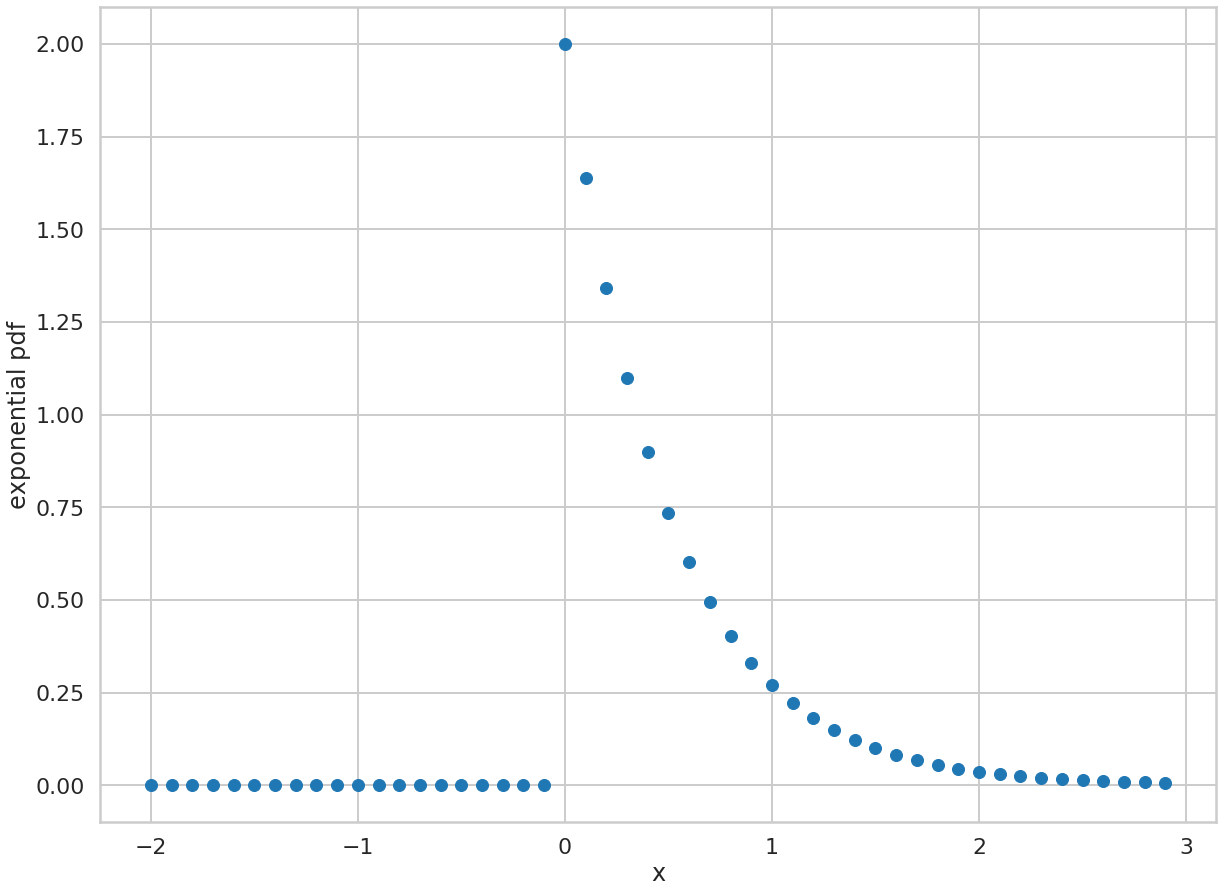

In [7]:
f = lambda x, l: l*np.exp(-l*x)*(x > 0)
xpts = np.arange(-2, 3, 0.1)
plt.plot(xpts, f(xpts, 2), 'o');
plt.xlabel("x")
plt.ylabel("exponential pdf")

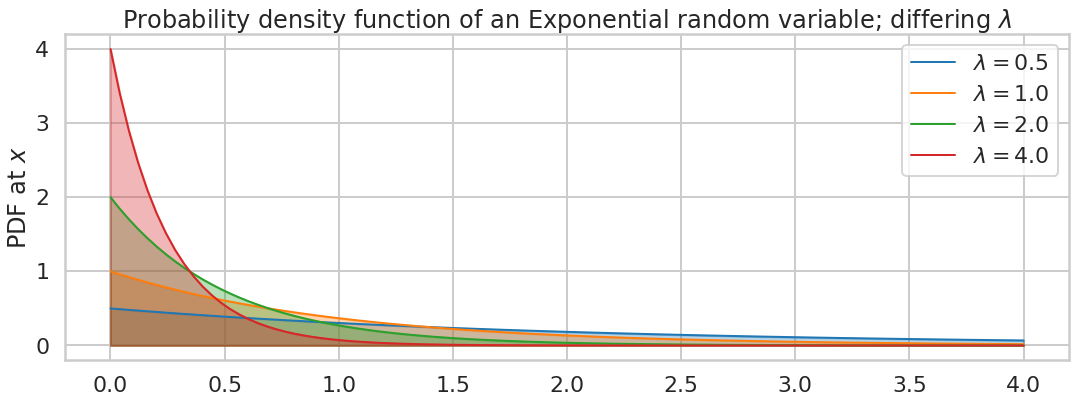

In [22]:
from scipy.stats import expon

x = np.linspace(0, 4, 100)
colors=sns.color_palette()

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(18, 6))
for l, c in zip(lambda_, colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2,
             color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.title("Probability density function of an Exponential random variable; differing $\lambda$");

Text(0.5, 1.0, 'exponential pdf and samples(normalized)')

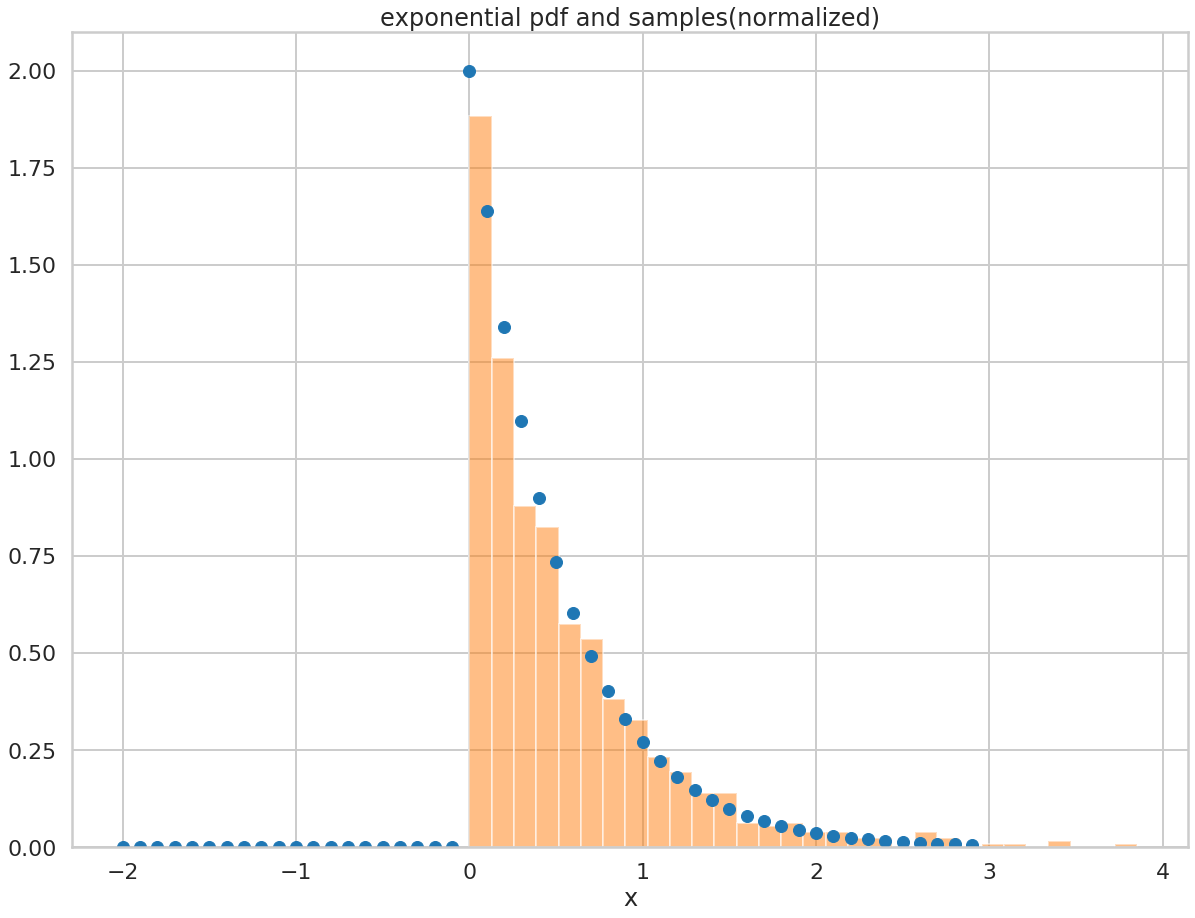

In [6]:
from scipy.stats import expon
plt.plot(xpts, expon.pdf(xpts, scale=1./2.), 'o')
plt.hist(expon.rvs(size=1000, scale=1./2.), density=True, alpha=0.5, bins=30);
plt.xlabel("x")
plt.title("exponential pdf and samples(normalized)")

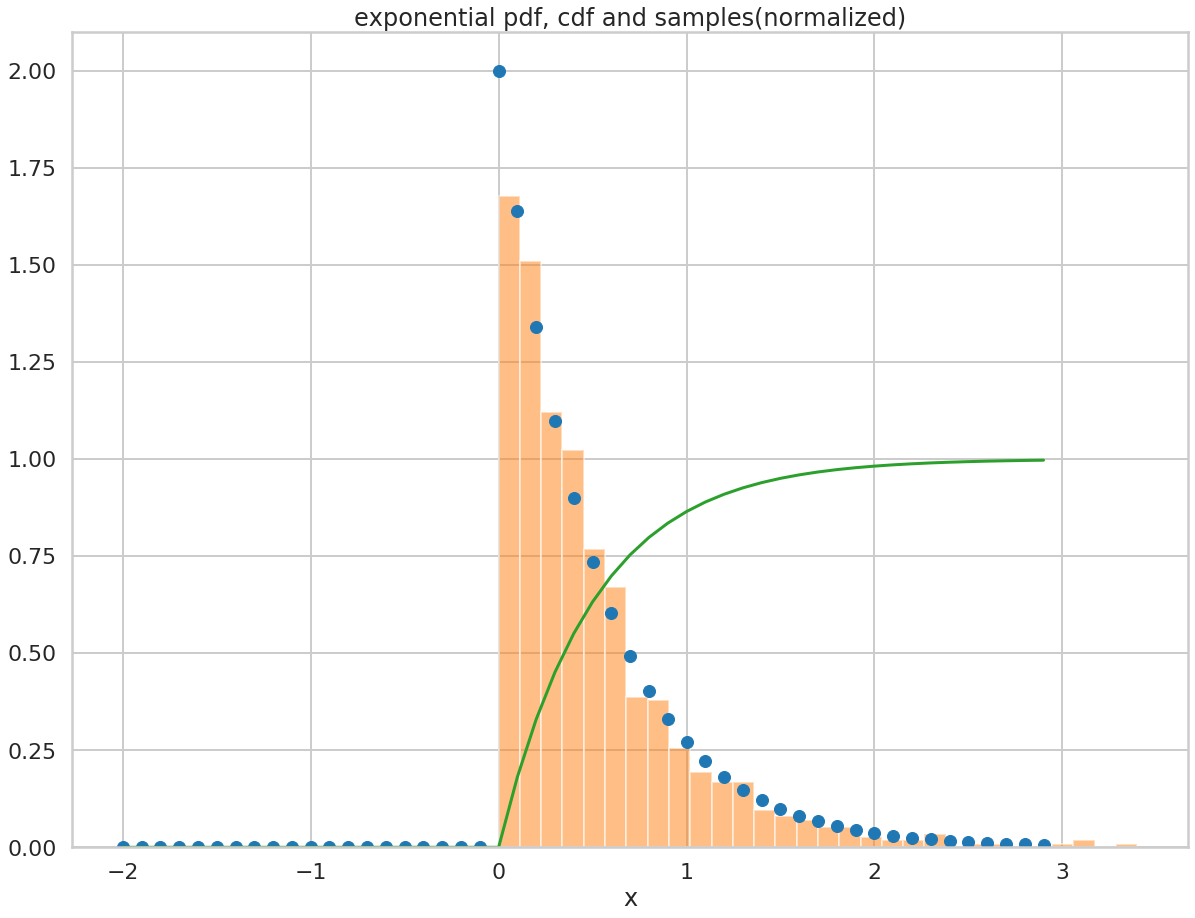

In [9]:
rv = expon(scale=0.5)
plt.plot(xpts, rv.pdf(xpts), 'o')
plt.hist(rv.rvs(size=1000), density=True, alpha=0.5, bins=30);
plt.plot(xpts, rv.cdf(xpts));
plt.xlabel('x')
plt.title("exponential pdf, cdf and samples(normalized)");

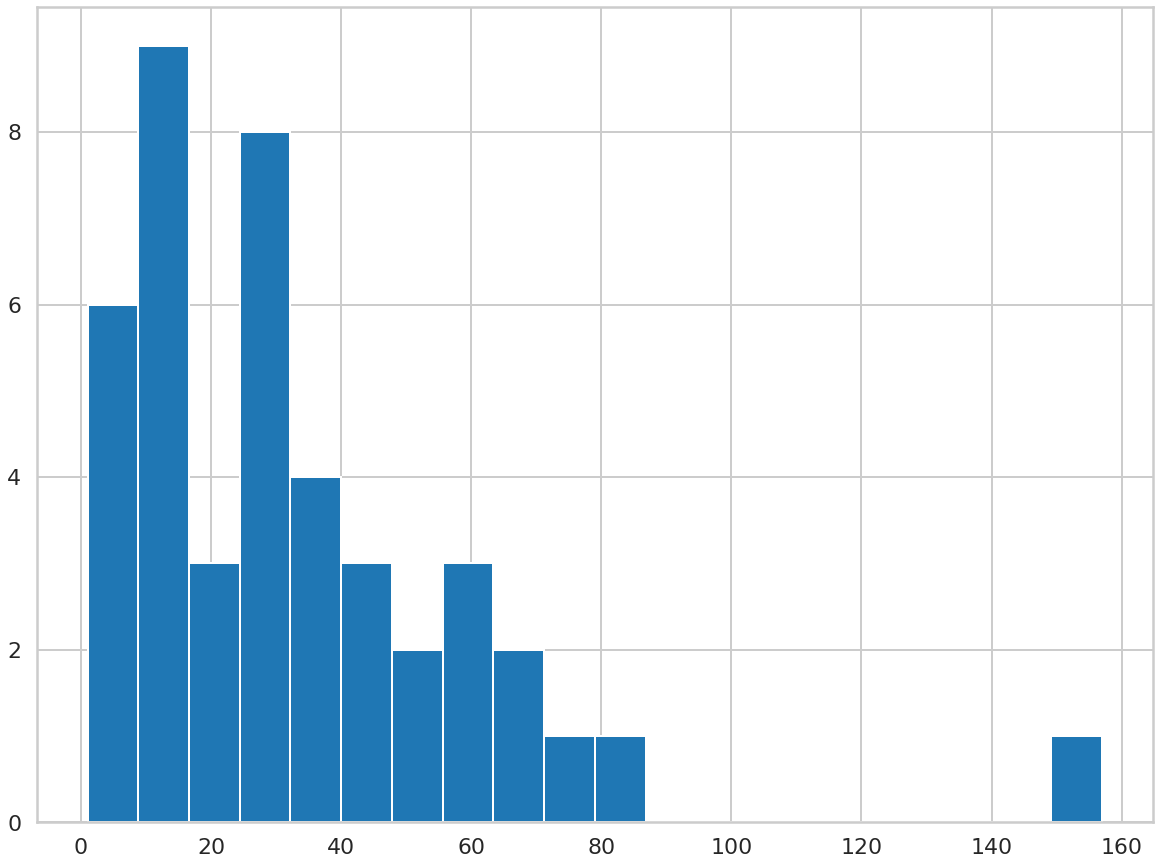

In [12]:
timediffs = df.minutes.diff()[1:]
timediffs.hist(bins=20);

In [13]:
lambda_from_mean = 1./timediffs.mean()
print(lambda_from_mean, 1./lambda_from_mean)

0.03006993006993007 33.25581395348837


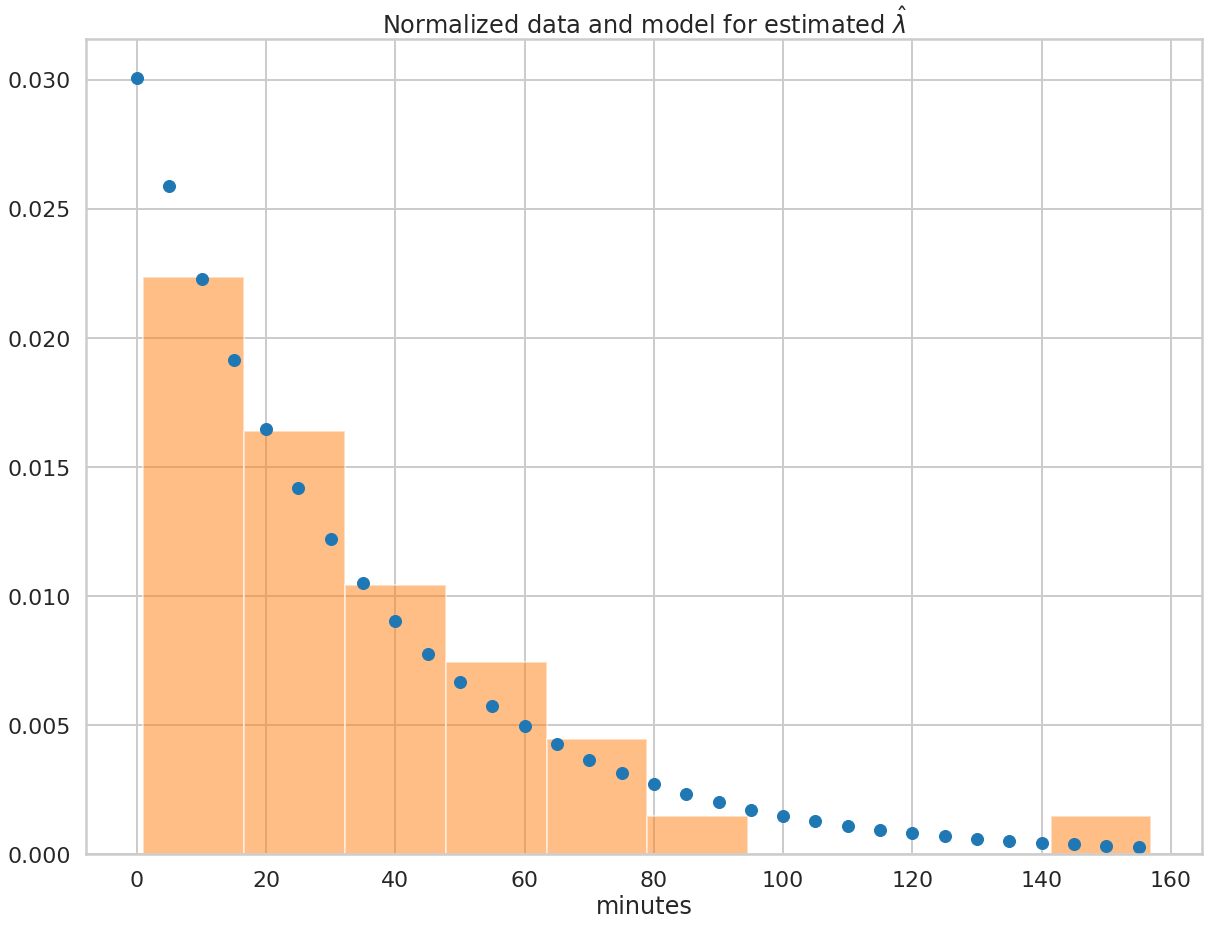

In [16]:
minutes=np.arange(0, 160, 5)
rv = expon(scale=1./lambda_from_mean)
plt.plot(minutes, rv.pdf(minutes), 'o')
timediffs.hist(density=True, alpha=0.5);
plt.xlabel("minutes");
plt.title("Normalized data and model for estimated $\hat{\lambda}$");

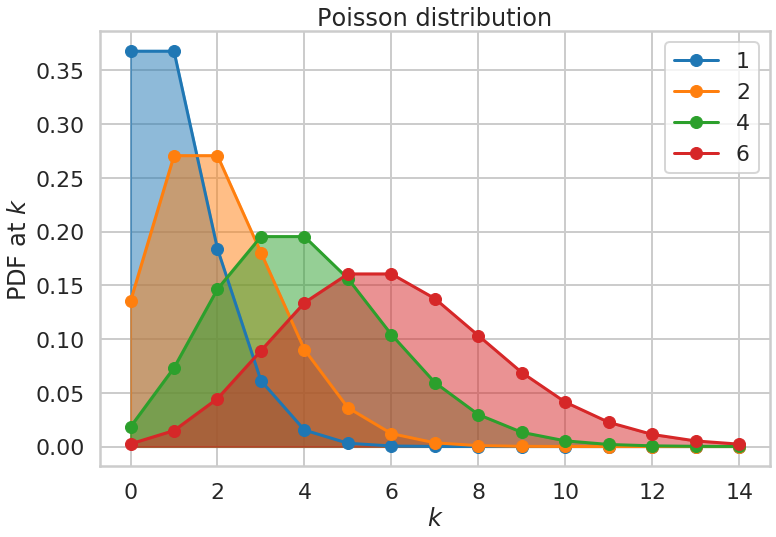

In [19]:
colors=sns.color_palette()

from scipy.stats import poisson
k = np.arange(15)
plt.figure(figsize=(12, 8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$");

In [20]:
df.minutes

0        5
1       64
2       78
3      115
4      177
5      245
6      247
7      262
8      271
9      428
10     455
11     492
12     494
13     549
14     635
15     649
16     653
17     693
18     729
19     776
20     785
21     846
22     847
23     873
24     886
25     914
26     991
27    1017
28    1062
29    1087
30    1105
31    1134
32    1149
33    1187
34    1189
35    1191
36    1210
37    1237
38    1251
39    1264
40    1283
41    1337
42    1407
43    1435
Name: minutes, dtype: int64

In [21]:
per_hour = df.minutes // 60
per_hour

0      0
1      1
2      1
3      1
4      2
5      4
6      4
7      4
8      4
9      7
10     7
11     8
12     8
13     9
14    10
15    10
16    10
17    11
18    12
19    12
20    13
21    14
22    14
23    14
24    14
25    15
26    16
27    16
28    17
29    18
30    18
31    18
32    19
33    19
34    19
35    19
36    20
37    20
38    20
39    21
40    21
41    22
42    23
43    23
Name: minutes, dtype: int64

In [22]:
num_births_per_hour = df.groupby(per_hour).minutes.count()
num_births_per_hour

minutes
0     1
1     3
2     1
4     4
7     2
8     2
9     1
10    3
11    1
12    2
13    1
14    4
15    1
16    2
17    1
18    3
19    4
20    3
21    2
22    1
23    2
Name: minutes, dtype: int64

In [23]:
num_births_per_hour.mean()

2.0952380952380953

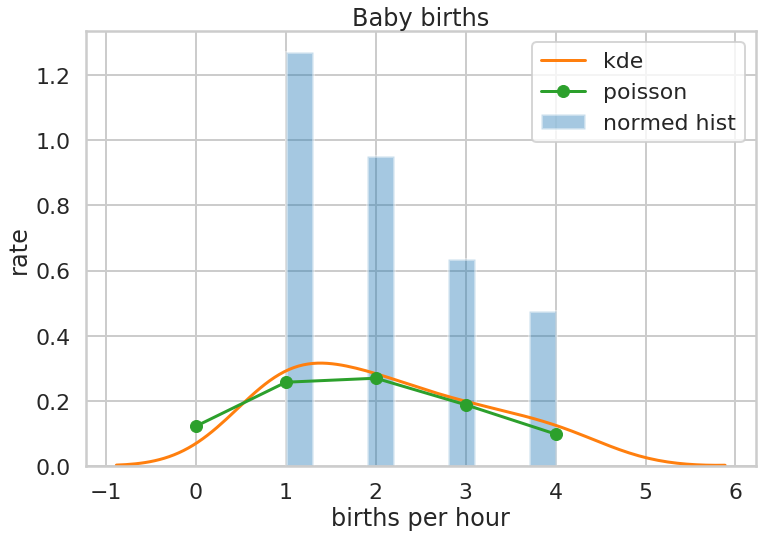

In [24]:
k = np.arange(5)
plt.figure(figsize=(12, 8))
tcount=num_births_per_hour.sum()
plt.hist(num_births_per_hour, alpha=0.4, lw=3, density=True, label="normed hist")
sns.kdeplot(num_births_per_hour, label='kde')
plt.plot(k, poisson.pmf(k, num_births_per_hour.mean()), '-o', label="poisson")
plt.title("Baby births")
plt.xlabel("births per hour")
plt.ylabel("rate")
plt.legend();

## many samples on binomial

In [26]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [27]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [29]:
sample_sizes=np.arange(1, 1001, 1)
sample_means=[make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [33]:
len(sample_means)

1000

In [34]:
sample_means

[array([1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.]),
 array([0.5, 1. , 0.5, 0. , 0. , 1. , 1. , 0. , 1. , 0.5, 0.5, 0. , 1. ,
        0. , 0.5, 0.5, 1. , 0

In [35]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

In [39]:
len(mean_of_sample_means)

1000

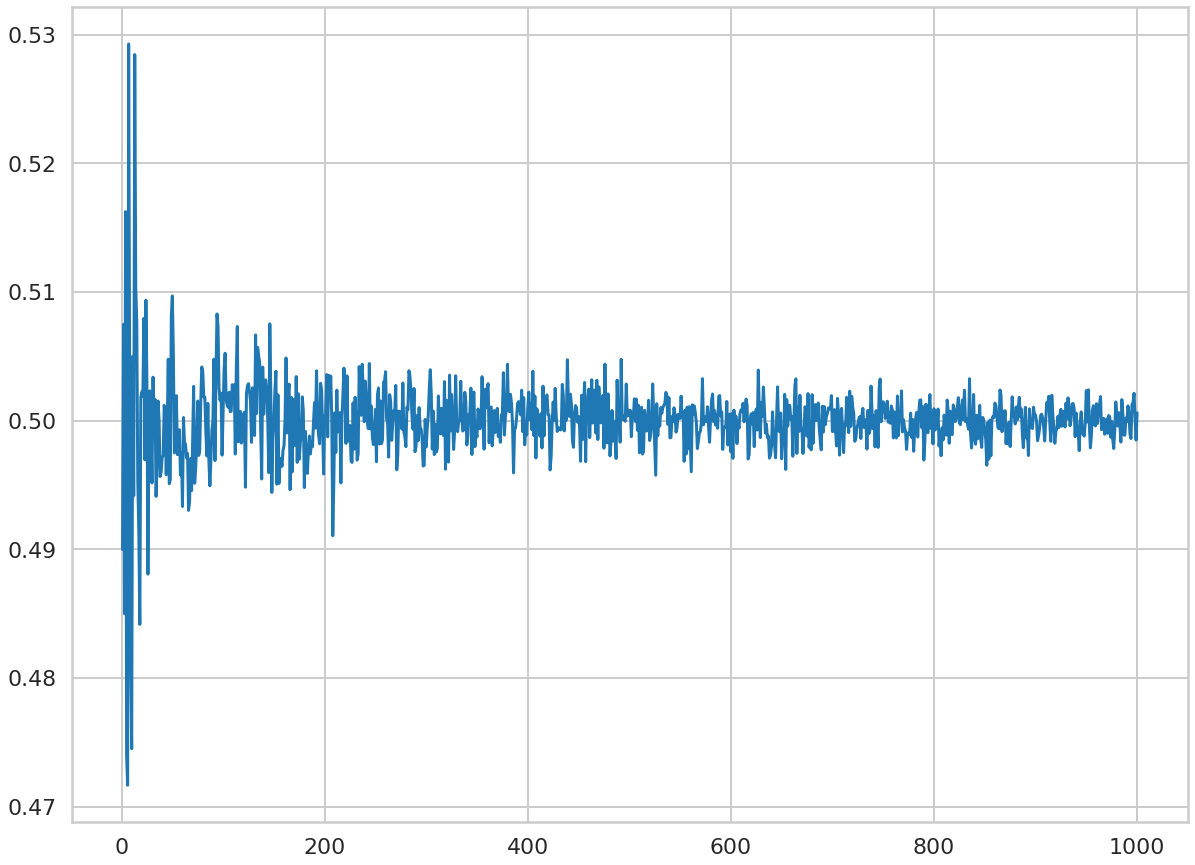

In [41]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim;

## Bootstrap

### Non-Parametric bootstrap

In [56]:
M_samples=10000
N_points = timediffs.shape[0]
bs_np = np.random.choice(timediffs, size=(M_samples, N_points)) # .choice() 默认 replace = True

In [44]:
bs_np

array([[ 14.,  25.,  18., ...,  13.,  59.,  27.],
       [  2.,  61.,  18., ...,  14.,  77.,  14.],
       [ 27.,  36.,   9., ...,  36.,  27.,  62.],
       ...,
       [ 55.,  28.,  40., ...,  29., 157.,   2.],
       [ 27.,  13.,   4., ...,  37.,  25.,  29.],
       [  2.,  29.,  18., ...,  37.,  55.,  19.]])

In [46]:
timediffs.shape

(43,)

In [48]:
bs_np.shape

(10000, 43)

In [49]:
timediffs.mean()

33.25581395348837

In [47]:
sd_mean=np.mean(bs_np, axis=1)
sd_mean

array([28.93023256, 37.23255814, 32.53488372, ..., 32.69767442,
       31.86046512, 36.95348837])

In [50]:
sd_std=np.std(bs_np, axis=1)
sd_std

array([26.98440148, 34.91307292, 22.14261265, ..., 28.83919723,
       33.27096744, 33.85465066])

In [51]:
np.std(timediffs)

29.21539338061343

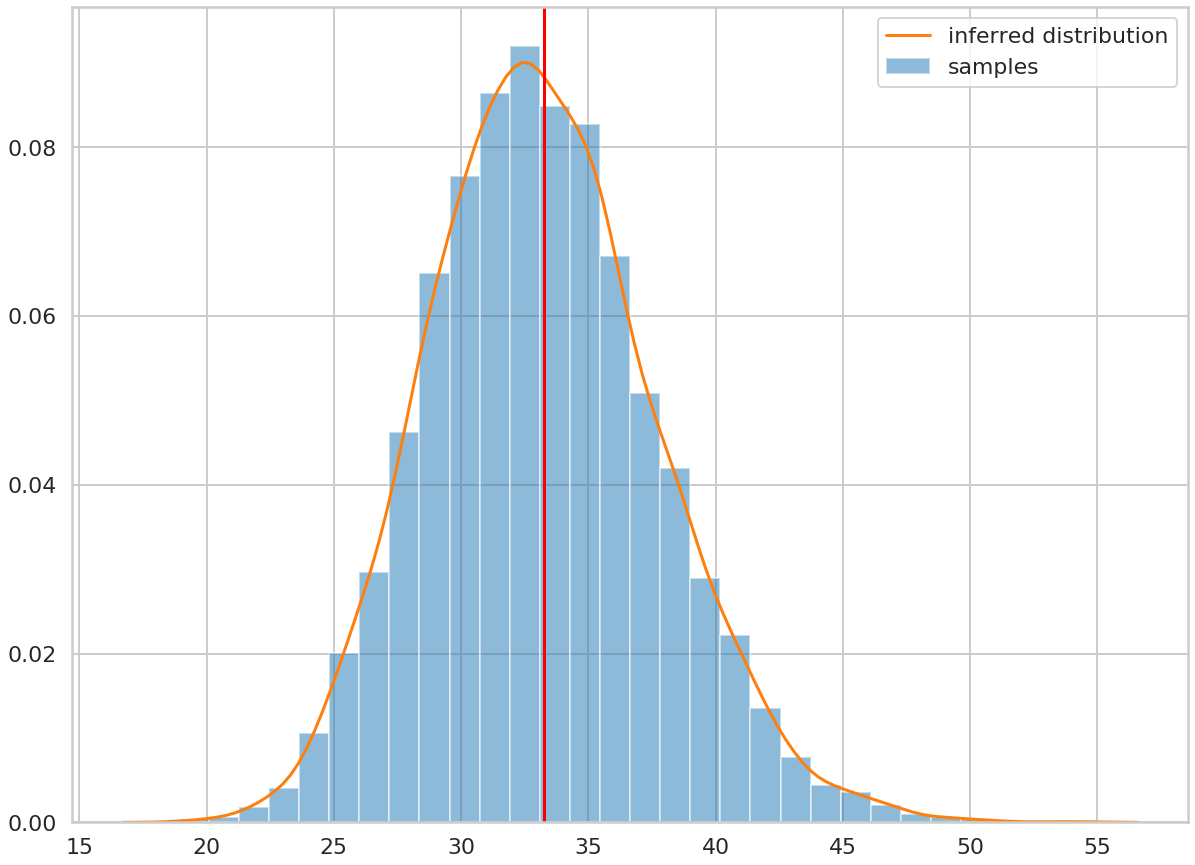

In [53]:
plt.hist(sd_mean, bins=30, density=True, alpha=0.5, label="samples");
sns.kdeplot(sd_mean, label="inferred distribution")
plt.axvline(timediffs.mean(), 0, 1, color='r', label="Our sample")
plt.legend;

### Parametric Bootstrap

In [57]:
rv = expon(scale=1./lambda_from_mean)
M_samples=10000
N_points = timediffs.shape[0]
bs_p = rv.rvs(size=(M_samples, N_points))

In [58]:
bs_p

array([[12.23629506, 13.15619578, 41.15268454, ...,  9.07096876,
        15.43195228,  2.84885554],
       [48.72746889, 11.57347802, 10.91750455, ...,  4.10206347,
        17.20172227,  6.93973118],
       [12.89783264, 77.75557552,  5.070359  , ..., 52.52846341,
        86.89316754, 78.81436348],
       ...,
       [17.5896017 , 23.40655892, 60.25236231, ..., 96.76467877,
        26.82604374, 37.4642149 ],
       [10.83408691, 23.84509543, 26.91093371, ..., 17.72803394,
        75.82760019, 20.20269661],
       [16.88614496,  6.80261571, 16.54737402, ..., 31.99310167,
        33.4955357 ,  6.72361223]])

In [59]:
bs_p.shape

(10000, 43)

In [60]:
sd_mean_p=np.mean(bs_p, axis=1)
sd_mean_p

array([22.92710527, 27.25403916, 31.14580473, ..., 35.68760177,
       30.28870292, 41.4345844 ])

In [62]:
sd_std_p=np.std(bs_p, axis=1)
sd_std_p

array([23.39766404, 32.31393927, 30.31660877, ..., 37.96507541,
       23.69037802, 38.96958266])

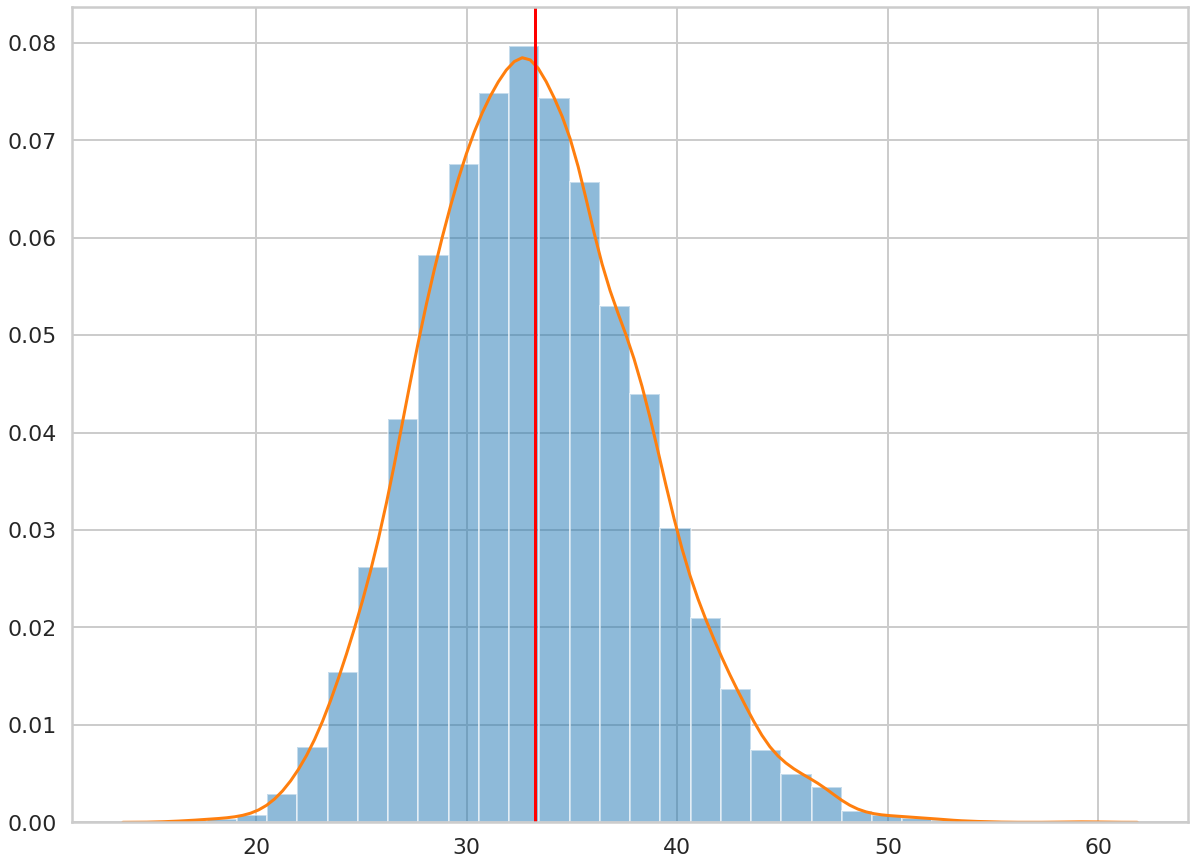

In [64]:
plt.hist(sd_mean_p, bins=30, density=True, alpha=0.5);
sns.kdeplot(sd_mean_p);
plt.axvline(timediffs.mean(), 0, 1, color='r', label='Our Sample');